API do Banco Central¶
https://dadosabertos.bcb.gov.br/dataset?res_format=API

In [1]:
import pandas as pd
import requests

In [2]:
#loop infinito
tabela_final = pd.DataFrame()

pular_indice=0

while True:   
    
    links=f"https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$skip={pular_indice}&$orderby=Data%20desc&$format=json"
    requisicaoS= requests.get(links)
    informacoesS = requisicaoS.json()

    tabelaS = pd.DataFrame(informacoesS["value"])
    
    if len(informacoesS["value"]) < 1:
        break
    tabela_final = pd.concat([tabela_final, tabelaS])
    #pular_indice= pular_indice +10000
    pular_indice += 10000

    #pegar de 10.000 de 10.000
display(tabela_final)

,Data,Quantidade,Valor,Denominacao,Especie
0,2023-12-29,3191004939,3.191005e+07,0.01,Moedas
1,2023-12-29,7873217732,3.936609e+08,0.05,Moedas
2,2023-12-29,8037834323,8.037834e+08,0.10,Moedas
3,2023-12-29,3605252693,9.013132e+08,0.25,Moedas
4,2023-12-29,3642902444,1.821451e+09,0.50,Moedas
...,...,...,...,...,...
2512,1994-10-03,181609358,1.816094e+08,1.00,Moedas
2513,1994-10-03,252922174,1.264611e+09,5.00,Cédulas
2514,1994-10-03,273630983,2.736310e+09,10.00,Cédulas
2515,1994-10-03,28945486,1.447274e+09,50.00,Cédulas


In [3]:
tabela_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         92517 non-null  object 
 1   Quantidade   92517 non-null  int64  
 2   Valor        92517 non-null  float64
 3   Denominacao  92517 non-null  object 
 4   Especie      92517 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ MB


In [4]:
tabela_final['Data'] = pd.to_datetime(tabela_final['Data'], format='%Y-%m-%d')


In [5]:
tabela_final['Denominacao'] = tabela_final['Denominacao'].astype('float')

In [6]:
tabela_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         92517 non-null  datetime64[ns]
 1   Quantidade   92517 non-null  int64         
 2   Valor        92517 non-null  float64       
 3   Denominacao  92517 non-null  float64       
 4   Especie      92517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.2+ MB


In [7]:
nota_10_reais= tabela_final.loc[tabela_final['Denominacao']==10]

In [8]:
display(nota_10_reais)

,Data,Quantidade,Valor,Denominacao,Especie
9,2023-12-29,671180112,6.711801e+09,10.0,Cédulas
23,2023-12-28,668623012,6.686230e+09,10.0,Cédulas
37,2023-12-27,670640420,6.706404e+09,10.0,Cédulas
51,2023-12-26,668089341,6.680893e+09,10.0,Cédulas
65,2023-12-22,663308927,6.633089e+09,10.0,Cédulas
...,...,...,...,...,...
2470,1994-10-07,307040205,3.070402e+09,10.0,Cédulas
2481,1994-10-06,286036456,2.860365e+09,10.0,Cédulas
2492,1994-10-05,269358735,2.693587e+09,10.0,Cédulas
2503,1994-10-04,274680700,2.746807e+09,10.0,Cédulas


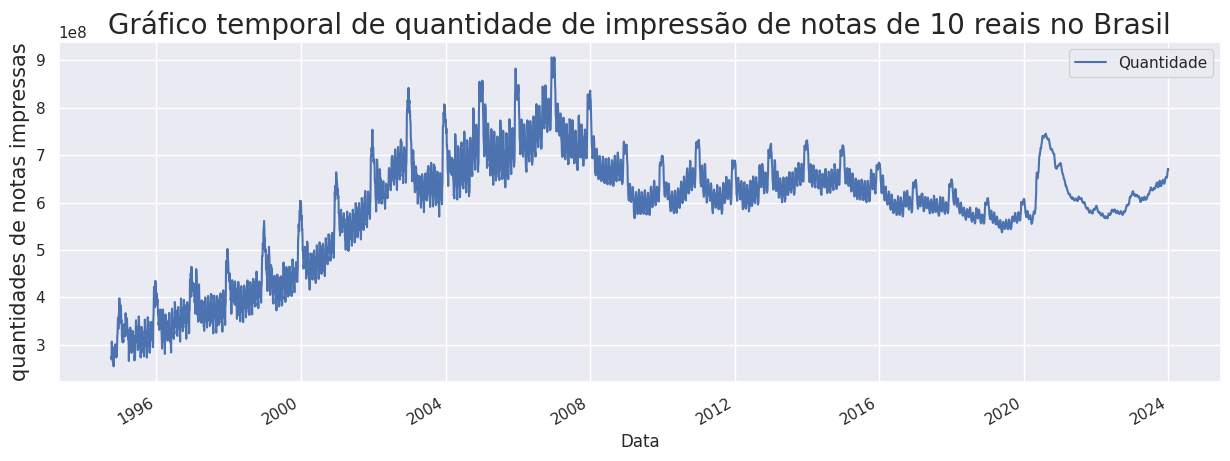

In [72]:
import matplotlib.pyplot as plt
nota_10_reais.plot(x='Data', y='Quantidade', figsize=(15, 5))
plt.ylabel('quantidades de notas impressas', fontsize = 15)
plt.title('Gráfico temporal de quantidade de impressão de notas de 10 reais no Brasil',fontsize = 20)
plt.savefig('Graficos_dash_BC/grafico_notas_10_reais.png')
plt.show()

# Gráficos 


In [10]:
moedas_todas= tabela_final.loc[tabela_final['Especie']=="Moedas"]

In [11]:
moedas_todas

,Data,Quantidade,Valor,Denominacao,Especie
0,2023-12-29,3191004939,3.191005e+07,0.01,Moedas
1,2023-12-29,7873217732,3.936609e+08,0.05,Moedas
2,2023-12-29,8037834323,8.037834e+08,0.10,Moedas
3,2023-12-29,3605252693,9.013132e+08,0.25,Moedas
4,2023-12-29,3642902444,1.821451e+09,0.50,Moedas
...,...,...,...,...,...
2507,1994-10-03,462277579,2.311388e+07,0.05,Moedas
2508,1994-10-03,404559065,4.045591e+07,0.10,Moedas
2509,1994-10-03,1492870,3.732175e+05,0.25,Moedas
2510,1994-10-03,278901842,1.394509e+08,0.50,Moedas


In [12]:
moedas_todas = moedas_todas.reset_index()

In [13]:
#!pip install seaborn

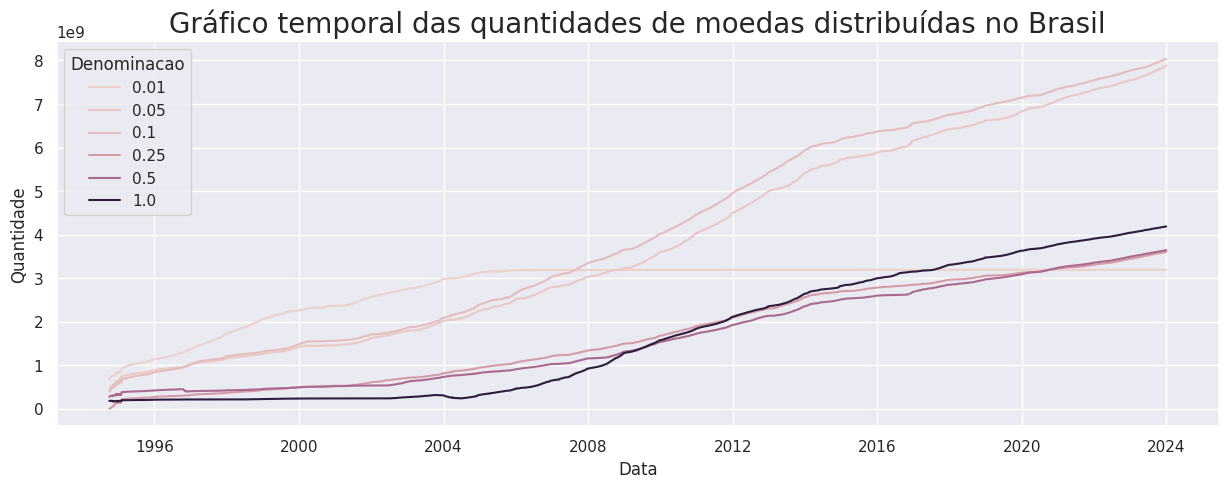

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
#quantidade de moedas

# Set the figure size using Matplotlib
fig, ax= plt.subplots(figsize =(15,5))

# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Your Seaborn code with the palette parameter
#sns.lineplot(x="Data", y="Quantidade", palette="viridis", ax=ax, data=moedas_todas)
sns.lineplot(x="Data", y="Quantidade", hue="Denominacao", ax=ax, data=moedas_todas)
plt.title('Gráfico temporal das quantidades de moedas distribuídas no Brasil',fontsize = 20)
plt.savefig('Graficos_dash_BC/grafico_temporal.png')

# Show the plot
plt.show()

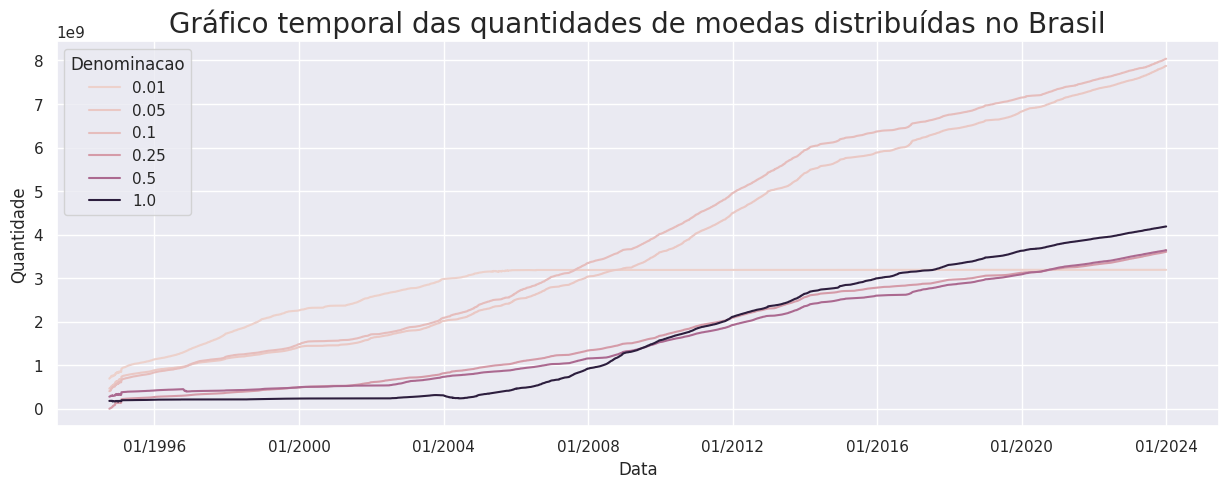

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

#quantidade de moedas

# Set the figure size using Matplotlib
fig, ax= plt.subplots(figsize =(15,5))

# Set Seaborn theme
sns.set_theme(style="darkgrid")
ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))

# Your Seaborn code with the palette parameter
#sns.lineplot(x="Data", y="Quantidade", palette="viridis", ax=ax, data=moedas_todas)
sns.lineplot(x="Data", y="Quantidade", hue="Denominacao", ax=ax, data=moedas_todas)
plt.title('Gráfico temporal das quantidades de moedas distribuídas no Brasil',fontsize = 20)

# Show the plot
plt.show()



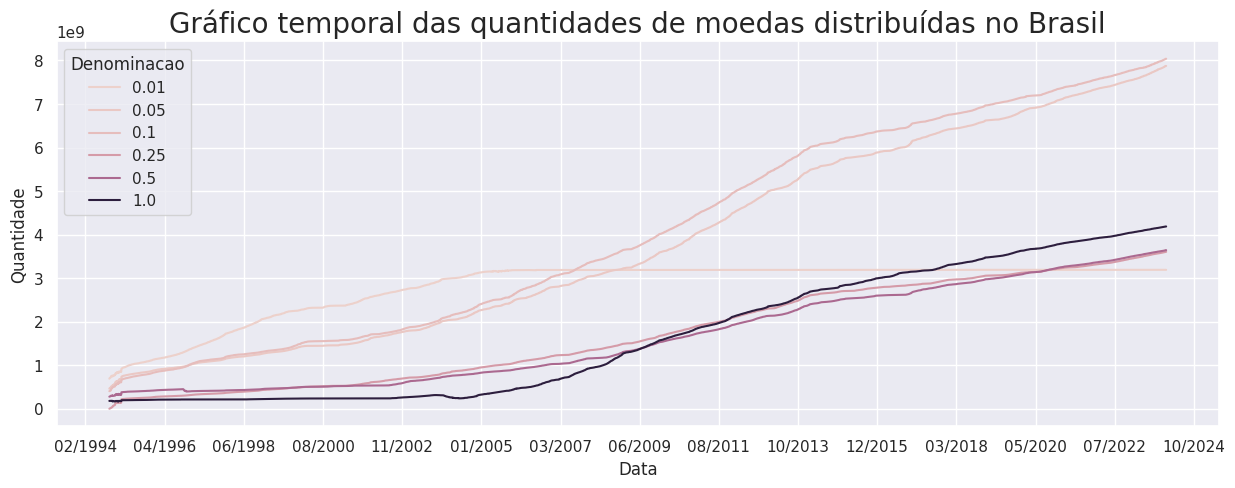

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

#quantidade de moedas

# Set the figure size using Matplotlib
fig, ax= plt.subplots(figsize =(15,5))

# Set Seaborn theme
sns.set_theme(style="darkgrid")

#quero 15 marcadores, 
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))

# Your Seaborn code with the palette parameter
#sns.lineplot(x="Data", y="Quantidade", palette="viridis", ax=ax, data=moedas_todas)
sns.lineplot(x="Data", y="Quantidade", hue="Denominacao", ax=ax, data=moedas_todas)
plt.title('Gráfico temporal das quantidades de moedas distribuídas no Brasil',fontsize = 20)
plt.savefig('Graficos_dash_BC/grafico_temporalmoedas.png')

# Show the plot
plt.show()


In [17]:
tabela_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         92517 non-null  datetime64[ns]
 1   Quantidade   92517 non-null  int64         
 2   Valor        92517 non-null  float64       
 3   Denominacao  92517 non-null  float64       
 4   Especie      92517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.2+ MB


In [18]:
tabela_final['Ano'] = tabela_final['Data'].dt.year

In [19]:
tabela_final

,Data,Quantidade,Valor,Denominacao,Especie,Ano
0,2023-12-29,3191004939,3.191005e+07,0.01,Moedas,2023
1,2023-12-29,7873217732,3.936609e+08,0.05,Moedas,2023
2,2023-12-29,8037834323,8.037834e+08,0.10,Moedas,2023
3,2023-12-29,3605252693,9.013132e+08,0.25,Moedas,2023
4,2023-12-29,3642902444,1.821451e+09,0.50,Moedas,2023
...,...,...,...,...,...,...
2512,1994-10-03,181609358,1.816094e+08,1.00,Moedas,1994
2513,1994-10-03,252922174,1.264611e+09,5.00,Cédulas,1994
2514,1994-10-03,273630983,2.736310e+09,10.00,Cédulas,1994
2515,1994-10-03,28945486,1.447274e+09,50.00,Cédulas,1994


In [20]:
Soma_anual= tabela_final.groupby(['Ano','Denominacao', 'Especie']).agg({'Quantidade': 'sum'})
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [21]:
Soma_anual= Soma_anual.reset_index()
display(Soma_anual)

,Ano,Denominacao,Especie,Quantidade
0,1994,0.01,Moedas,47891372353
1,1994,0.05,Moedas,34699395947
2,1994,0.10,Moedas,31157703274
3,1994,0.25,Moedas,4912530400
4,1994,0.50,Moedas,19122563736
...,...,...,...,...
374,2023,10.00,Cédulas,155950609565
375,2023,20.00,Cédulas,179072187263
376,2023,50.00,Cédulas,449826123474
377,2023,100.00,Cédulas,452976328959


In [22]:
Soma_anual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          379 non-null    int64  
 1   Denominacao  379 non-null    float64
 2   Especie      379 non-null    object 
 3   Quantidade   379 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.0+ KB


In [30]:
#!pip install dash
#!pip install --upgrade werkzeug
#pip install --upgrade werkzeug
#!pip install dash==1.20.0 werkzeug==0.16.1
#pip install --upgrade Flask
#pip install Flask dash
#pip install --upgrade click

#deu certo
#pip uninstall dash
#pip install dash dash-auth

In [31]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8051)

acessei por aqui :http://127.0.0.1:8050/

acessei por aqui :http://127.0.0.1:8051/



In [32]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [34]:
Soma_anual_geral= Soma_anual.groupby(['Ano', 'Especie']).agg({'Quantidade': 'sum'})
Soma_anual_geral= Soma_anual_geral.reset_index()
display(Soma_anual_geral)

,Ano,Especie,Quantidade
0,1994,Cédulas,53606226142
1,1994,Moedas,148753135308
2,1995,Cédulas,205662829391
3,1995,Moedas,842750925954
4,1996,Cédulas,244780471688
5,1996,Moedas,1016844391027
6,1997,Cédulas,292023409857
7,1997,Moedas,1187671163922
8,1998,Cédulas,318542674333
9,1998,Moedas,1344989299962


In [35]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig2 = px.bar(Soma_anual_geral, x="Ano", y="Quantidade", color="Especie", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [36]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual, x="Especie", y="Quantidade", color="Ano", size="Denominacao", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [37]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual, x="Ano", y="Quantidade", color="Especie", size="Denominacao", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [38]:
Soma_anual_v= tabela_final.groupby(['Ano','Denominacao', 'Especie']).agg({'Quantidade': 'sum', 'Valor': 'sum'})
Soma_anual_v=Soma_anual_v.reset_index()
Soma_anual_v

,Ano,Denominacao,Especie,Quantidade,Valor
0,1994,0.01,Moedas,47891372353,4.789137e+08
1,1994,0.05,Moedas,34699395947,1.734970e+09
2,1994,0.10,Moedas,31157703274,3.115770e+09
3,1994,0.25,Moedas,4912530400,1.228133e+09
4,1994,0.50,Moedas,19122563736,9.561282e+09
...,...,...,...,...,...
374,2023,10.00,Cédulas,155950609565,1.559506e+12
375,2023,20.00,Cédulas,179072187263,3.581444e+12
376,2023,50.00,Cédulas,449826123474,2.249131e+13
377,2023,100.00,Cédulas,452976328959,4.529763e+13


In [39]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao", size="Quantidade", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [40]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [41]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Denominacao", y="Quantidade", color="Ano", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [42]:
Soma_anual_geral_v= Soma_anual_v.groupby(['Ano', 'Especie']).agg({'Quantidade': 'sum','Valor': 'sum'})
Soma_anual_geral_v= Soma_anual_geral_v.reset_index()
display(Soma_anual_geral_v)

,Ano,Especie,Quantidade,Valor
0,1994,Cédulas,53606226142,4.424041e+11
1,1994,Moedas,148753135308,2.708864e+10
2,1995,Cédulas,205662829391,2.126195e+12
3,1995,Moedas,842750925954,1.441575e+11
4,1996,Cédulas,244780471688,3.053131e+12
5,1996,Moedas,1016844391027,1.648395e+11
6,1997,Cédulas,292023409857,3.923805e+12
7,1997,Moedas,1187671163922,1.734607e+11
8,1998,Cédulas,318542674333,4.481490e+12
9,1998,Moedas,1344989299962,1.843240e+11


In [43]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_geral_v, x="Especie", y="Quantidade", color="Ano", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [44]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_geral_v, x="Quantidade", y="Ano", color="Especie", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [45]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")
fig2 = px.scatter(Soma_anual_v, x="Denominacao", y="Quantidade", color="Especie", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [46]:
Soma_anual_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          379 non-null    int64  
 1   Denominacao  379 non-null    float64
 2   Especie      379 non-null    object 
 3   Quantidade   379 non-null    int64  
 4   Valor        379 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.9+ KB


In [47]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")
#fig2 = px.scatter(Soma_anual_v, x="Denominacao", y="Quantidade", color="Especie", size="Valor", size_max=60)
#fig2 = px.scatter(df, x="Quantidade", y="Valor Final", color="Produto", size="Valor Unitário", size_max=60)
fig2 = px.scatter(Soma_anual_v, x="Quantidade", y="Denominacao", color="Especie", size="Valor", size_max=60)


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)



In [48]:
Soma_anual_v

,Ano,Denominacao,Especie,Quantidade,Valor
0,1994,0.01,Moedas,47891372353,4.789137e+08
1,1994,0.05,Moedas,34699395947,1.734970e+09
2,1994,0.10,Moedas,31157703274,3.115770e+09
3,1994,0.25,Moedas,4912530400,1.228133e+09
4,1994,0.50,Moedas,19122563736,9.561282e+09
...,...,...,...,...,...
374,2023,10.00,Cédulas,155950609565,1.559506e+12
375,2023,20.00,Cédulas,179072187263,3.581444e+12
376,2023,50.00,Cédulas,449826123474,2.249131e+13
377,2023,100.00,Cédulas,452976328959,4.529763e+13


In [49]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")
#fig2 = px.scatter(Soma_anual_v, x="Denominacao", y="Quantidade", color="Especie", size="Valor", size_max=60)
#fig2 = px.scatter(df, x="Quantidade", y="Valor Final", color="Produto", size="Valor Unitário", size_max=60)
fig2 = px.scatter(Soma_anual_v, x="Ano", y="Denominacao", color="Especie", size="Quantidade", size_max=60)


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)



In [50]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")
#fig2 = px.scatter(Soma_anual_v, x="Denominacao", y="Quantidade", color="Especie", size="Valor", size_max=60)
#fig2 = px.scatter(df, x="Quantidade", y="Valor Final", color="Produto", size="Valor Unitário", size_max=60)
fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao", size="Quantidade", size_max=60)


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children='Novos gráficos'),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)


In [51]:
Soma_anual_v_2020= Soma_anual_v.loc[Soma_anual_v['Ano']==2020]



In [52]:
Soma_anual_v_2020

,Ano,Denominacao,Especie,Quantidade,Valor
323,2020,0.01,Moedas,800986070334,8.009861e+09
324,2020,0.05,Moedas,1743733398190,8.718667e+10
325,2020,0.10,Moedas,1813940164868,1.813940e+11
326,2020,0.25,Moedas,793630032360,1.984075e+11
327,2020,0.50,Moedas,793078844184,3.965394e+11
328,2020,1.00,Cédulas,37328115827,3.732812e+10
329,2020,1.00,Moedas,927661665957,9.276617e+11
330,2020,2.00,Cédulas,363510324299,7.270206e+11
331,2020,5.00,Cédulas,160493763279,8.024688e+11
332,2020,10.00,Cédulas,166243034263,1.662430e+12


In [53]:
Soma_anual_v_2020['Denominacao1'] = Soma_anual_v_2020['Denominacao'].astype('str')

/tmp/ipykernel_23362/3481927344.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
Soma_anual_v_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 323 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ano           14 non-null     int64  
 1   Denominacao   14 non-null     float64
 2   Especie       14 non-null     object 
 3   Quantidade    14 non-null     int64  
 4   Valor         14 non-null     float64
 5   Denominacao1  14 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 784.0+ bytes


In [55]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig2 = px.bar(Soma_anual_v_2020, x="Denominacao1", y="Quantidade", color="Especie", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [56]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig2 = px.bar(Soma_anual_v_2020, x="Especie", y="Quantidade", color="Denominacao1", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig2
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=False, port=8052)

In [57]:
# para colocar na color tem que ser objeto ou string
Soma_anual['Denominacao1'] = Soma_anual['Denominacao'].astype('str')

In [58]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8051)

In [59]:
# lista_ano 
lista_ano = list(Soma_anual["Ano"].unique())
lista_ano.append("Todas")
lista_ano

[1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 'Todas']

In [60]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),

    #Botões para selecionar os anos
    dcc.RadioItems(lista_ano, value="Todas", id='selecao_ano'),

    dcc.Graph(
        id='nota-graph',
        figure=fig
    )    
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    #H3 html
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    #radioitems
    #id, parametro
    Output('nota-graph', 'figure'),
    Input('selecao_ano', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
)
def selecionar_marca(marca):
    if marca == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
    else:
        texto = f"Moedas e notas produzidas no Brasil no ano de {marca}"
        filtrando_ano= Soma_anual.loc[Soma_anual['Ano']==marca,:]
        
        fig = px.bar(filtrando_ano, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
    return texto, fig


if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8051)

In [61]:
Soma_anual_v['Denominacao1'] = Soma_anual_v['Denominacao'].astype('str')
Soma_anual_v

,Ano,Denominacao,Especie,Quantidade,Valor,Denominacao1
0,1994,0.01,Moedas,47891372353,4.789137e+08,0.01
1,1994,0.05,Moedas,34699395947,1.734970e+09,0.05
2,1994,0.10,Moedas,31157703274,3.115770e+09,0.1
3,1994,0.25,Moedas,4912530400,1.228133e+09,0.25
4,1994,0.50,Moedas,19122563736,9.561282e+09,0.5
...,...,...,...,...,...,...
374,2023,10.00,Cédulas,155950609565,1.559506e+12,10.0
375,2023,20.00,Cédulas,179072187263,3.581444e+12,20.0
376,2023,50.00,Cédulas,449826123474,2.249131e+13,50.0
377,2023,100.00,Cédulas,452976328959,4.529763e+13,100.0


In [62]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),
        #Botões para selecionar os anos
    dcc.RadioItems(lista_ano, value="Todas", id='selecao_ano'),
    dcc.Graph(
        id='example-graph',
        figure=fig2
    ),

    
    
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    #H3 html
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    #radioitems
    #id, parâmetro  figure
    Output('example-graph', 'figure'),
    Input('selecao_ano', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
)
def selecionar_marca(marca):
    if marca == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)

    else:
        texto = f"Moedas e notas produzidas no Brasil no ano de {marca}"
        anual_filtro= Soma_anual_v.loc[Soma_anual_v['Ano']==marca,:]
        fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)

    return texto, fig2

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8052)
    #http://127.0.0.1:8052/

In [ ]:
#só botões acima

In [63]:
display(lista_ano)
lista_faixa_ano = ['Década de 90', 'Anos 2000', 'acima de 2009','Todas']
display(lista_faixa_ano)

[1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 'Todas']

['Década de 90', 'Anos 2000', 'acima de 2009', 'Todas']

# Gráficos que são bases 

In [64]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
fig_bar = px.bar(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),
        #Botões para selecionar os anos
    dcc.RadioItems(lista_faixa_ano, value="Todas", id='selecao_ano'),
    dcc.Graph(id='example-graph', figure=fig2 ),
    dcc.Graph(id='example-bar', figure=fig_bar),
        
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    #H3 html
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    #radioitems
    #id, parâmetro  figure
    Output('example-graph', 'figure'),
    Output('example-bar', 'figure'),
    Input('selecao_ano', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
)
def selecionar_marca(marca):
    if marca == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        fig_bar = px.bar(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
          
    #['Década de 90', 'Anos 2000', 'acima de 2009', 'Todas']
    elif marca == 'Década de 90':
        texto = f"Moedas e notas produzidas no Brasil sobre a {marca}"
        anual_filtro= Soma_anual_v.loc[Soma_anual_v['Ano']< 2000,:]
        fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
        
    elif marca == 'Anos 2000':
        texto = f"Moedas e notas produzidas no Brasil na marca dos {marca}"
        anual_filtro= Soma_anual_v.loc[Soma_anual_v['Ano'] > 2000,:]
        fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
    elif marca == 'acima de 2009':
        texto = f"Moedas e notas produzidas no Brasil na marca {marca}"
        anual_filtro= Soma_anual_v.loc[Soma_anual_v['Ano'] >= 2010,:]
        fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
                       
        

    return texto, fig2,fig_bar

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8052)
    #http://127.0.0.1:8052/

In [65]:
# lista_ano 
lista_cedulas = list(Soma_anual["Denominacao1"].unique())
lista_cedulas.append("Todas")
lista_cedulas

['0.01',
 '0.05',
 '0.1',
 '0.25',
 '0.5',
 '1.0',
 '5.0',
 '10.0',
 '50.0',
 '100.0',
 '2.0',
 '20.0',
 '200.0',
 'Todas']

In [66]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
#fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)


app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),

    #Botões para selecionar os anos
    dcc.RadioItems(lista_cedulas, value="Todas", id='selecao_cedulas'),

    dcc.Graph(id='nota-graph',figure=fig),
    
    dcc.Graph(id='figura_scatter',figure=fig2),    
    
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    #H3 html
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    #radioitems
    #id, parâmetro  figure
    Output('nota-graph', 'figure'),
    Output('figura_scatter', 'figure'),    
    Input('selecao_cedulas', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
)

#def selecionar_marca(marca): é o que se passa pelo input
#input vem de    dcc.RadioItems(lista_ano, value="Todas", id='selecao_ano'),

def selecionar_marca(marca):
    if marca == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
        fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)

    else:
        # filtrar as linhas da tabela onde a marca é igual a variável Cedula (denominacao1)
        #df_filtrada = df.loc[linha, coluna => quero tudo :]
       # df_filtrada_soma_anual = Soma_anual.loc[Soma_anual['Ano']==marca]
      #  marca_int= int(marca)
        df_filtrada_soma_anual_v = Soma_anual_v.loc[Soma_anual['Denominacao1']==marca, :]
        df_filtrada_soma_anual = Soma_anual.loc[Soma_anual['Denominacao1']==marca, :]
        marca_impresso= marca.replace('.',',')
        texto = f"Moedas e/ou notas produzidas no Brasil em espécie R$ {marca_impresso}"

        fig = px.bar(df_filtrada_soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
        #mesma ordem dos output (s) o return
        fig2 = px.scatter(df_filtrada_soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        
    return texto, fig, fig2


if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8051)

http://127.0.0.1:8051/

In [ ]:
#df_filtrada_soma_anual = Soma_anual.loc[Soma_anual['Ano']==lista_ano[7], :]

In [ ]:
#df_filtrada_soma_anual

In [67]:
# lista_ano 
lista_especie = list(Soma_anual["Especie"].unique())
lista_especie.append("Todas")
lista_especie

['Moedas', 'Cédulas', 'Todas']

In [68]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

# Assuming you have a "long-form" data frame
# See https://plotly.com/python/px-arguments/ for more options

# Plotly
fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")

app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),
    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),
    # Botões para selecionar as cédulas
    dcc.RadioItems(options=lista_especie, value="Todas", id='selecao_especie'),
    dcc.Graph(
        id='nota-graph',
        figure=fig
    )
], style={"text-align": "center"})

# Callbacks
@app.callback(
    Output('subtitulo', 'children'),
    #colocar o id da figura graph e a figure, parametro
    Output('nota-graph', 'figure'),
    Input('selecao_especie', 'value')
)
def selecionar_marca(marca):
    if marca == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig = px.bar(Soma_anual, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
    else:
        #marca especie
        df_filtrada = Soma_anual.loc[Soma_anual['Especie'] == marca, :]
        texto = f"Moedas e notas produzidas no Brasil em {marca}"
        fig = px.bar(df_filtrada, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
    return texto, fig

if __name__ == '__main__':
    app.run(debug=True, port=8051)

http://127.0.0.1:8051/

In [69]:
Soma_anual

,Ano,Denominacao,Especie,Quantidade,Denominacao1
0,1994,0.01,Moedas,47891372353,0.01
1,1994,0.05,Moedas,34699395947,0.05
2,1994,0.10,Moedas,31157703274,0.1
3,1994,0.25,Moedas,4912530400,0.25
4,1994,0.50,Moedas,19122563736,0.5
...,...,...,...,...,...
374,2023,10.00,Cédulas,155950609565,10.0
375,2023,20.00,Cédulas,179072187263,20.0
376,2023,50.00,Cédulas,449826123474,50.0
377,2023,100.00,Cédulas,452976328959,100.0


# dois botões de filtros


In [70]:
lista_especie

['Moedas', 'Cédulas', 'Todas']

In [71]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
#dash board vázio

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

# plotly
#fig2 = px.bar(Soma_anual, x="Especie", y="Quantidade", color="Ano", barmode="group")

fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
fig_bar = px.bar(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Dash de Moedas e Notas no Brasil'),

    html.Div(children='''
        Dashboard de Cédulas no Brasil - do Banco Central - em Python.
    '''),
    html.H3(children="Moedas", id="subtitulo"),
        #Botões para selecionar os anos
    dcc.RadioItems(lista_faixa_ano, value="Todas", id='selecao_ano'),
    
        html.Div(children=[
        dcc.Dropdown(lista_especie, value="Todas", id='selecao_especies'),
        #https://dash.plotly.com/dash-core-components/dropdown
        #lista espécies de notas ou moedas, id e valor
        #deixar bonito e dentro de uma div do html o Dropdown, botao 
        #width comprimento
            #que vai no input
    ], style={"width": "50%", "margin": "auto"}),
    
    
    dcc.Graph(id='example-graph', figure=fig2 ),
    dcc.Graph(id='example-bar', figure=fig_bar),
        
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    #H3 html
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    #radioitems
    #id, parâmetro  figure
    Output('example-graph', 'figure'),
    Output('example-bar', 'figure'),
    Input('selecao_ano', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
    Input('selecao_especies', 'value')
)

#marca do ano
#def selecionar_marca(marca, especie): primeiro e segundo input
def selecionar_marca(marca, especie_nota ):
    if marca == "Todas" and especie_nota == "Todas":
        texto = "Moedas e notas produzidas no Brasil"
        fig2 = px.scatter(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
        fig_bar = px.bar(Soma_anual_v, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
      
    
    #['Década de 90', 'Anos 2000', 'acima de 2009', 'Todas']
    else:
        filtro_geral=Soma_anual_v
        if especie_nota != "Todas":
            # filtrar de acordo com o pais
            filtro_geral = filtro_geral.loc[filtro_geral["Especie"]==especie_nota, :]

        if marca == "Todas":
            texto = f"Moedas e notas produzidas no Brasil sobre todos os anos"
            fig2 = px.scatter(filtro_geral, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
            fig_bar = px.bar(filtro_geral, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
            
        if marca == 'Década de 90':
            texto = f"Moedas e notas produzidas no Brasil sobre a {marca}"
            anual_filtro= filtro_geral.loc[Soma_anual_v['Ano']< 2000,:]
            fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
            fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")

        if marca == 'Anos 2000':
            texto = f"Moedas e notas produzidas no Brasil na marca dos {marca}"
            anual_filtro= filtro_geral.loc[Soma_anual_v['Ano'] > 2000,:]
            fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
            fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")
        if marca == 'acima de 2009':
            texto = f"Moedas e notas produzidas no Brasil na marca {marca}"
            anual_filtro= filtro_geral.loc[Soma_anual_v['Ano'] >= 2010,:]
            fig2 = px.scatter(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", size="Valor", size_max=60)
            fig_bar = px.bar(anual_filtro, x="Ano", y="Quantidade", color="Denominacao1", barmode="group")

        

    return texto, fig2,fig_bar

if __name__ == '__main__':
    #app.run(debug=True)     #colocando no ar e atualizando normal
   # app.run(debug=False)     #colocando no ar
   # app.run(debug=False, port=8051)
    app.run(debug=True, port=8052)
    #http://127.0.0.1:8052/

http://127.0.0.1:8052/